In [11]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics

In [12]:
df = pd.read_csv("framingham.csv")
print(df.columns)
df

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [13]:
df = df.dropna(how="any", axis=0)

In [14]:
np.random.seed(190203)

indexes = np.arange(df.shape[0])
train_indexes = np.random.choice(indexes, size=2965)
test_indexes = np.delete(indexes, train_indexes, axis=0)

In [15]:
train = df.iloc[train_indexes]
test = df.iloc[test_indexes]

X_train = train.iloc[:, :-1]
Y_train = train.iloc[:, -1:].to_numpy().flatten()

X_test = test.iloc[:, :-1]
Y_test = test.iloc[:, -1:].to_numpy().flatten()

In [16]:
logistic_regressor = linear_model.LogisticRegression(penalty=None)
logistic_regressor.fit(X_train, Y_train)

print(logistic_regressor.coef_)

[[ 0.15009238  0.02266038 -0.34742325 -0.07272616  0.0183368   0.0386779
   0.01889417  0.4413203   0.08293274 -0.0024469   0.01905217 -0.01001034
  -0.03751276 -0.03709448  0.00258733]]


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
Y_pred = logistic_regressor.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

0.8527950310559006 0.5384615384615384 0.058577405857740586 0.10566037735849056


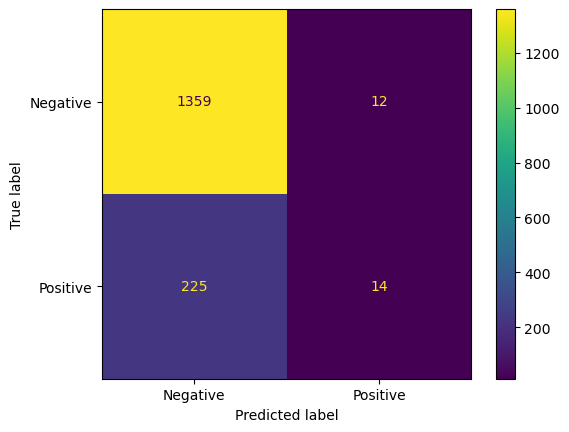

In [20]:
acc = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
f1_score = metrics.f1_score(Y_test, Y_pred)

print(acc, precision, recall, f1_score)

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Negative", "Positive"]).plot()